# Performance improvement for SQL (analysis)
0. Most important way to measure / analyze performance
   - EXPLAIN ANALYZE (mysql, postgres, not allowed in mssql)
   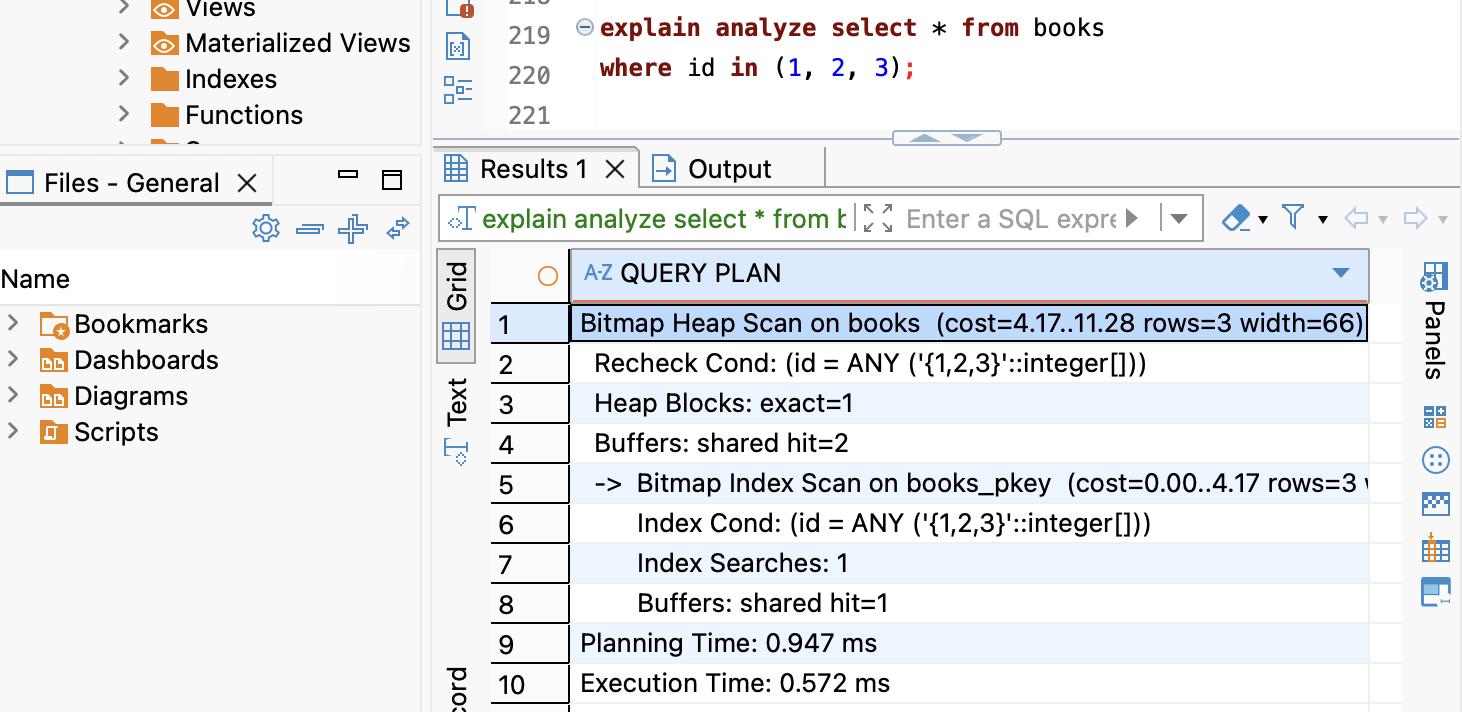
   - add monitor ro monitor the querying performance
1. Add proper indexes
   ```sql
   CREATE INDEX idx_customer_id ON orders(customer_id);
   ```
2. Read Replicas
3. Caching
4. Materialized Views (essentionally one of cache)
5. Partition
6. Shading
7. others:
   1. Avoid SELECT *
   2. Use JOINs efficiently
      Always join on indexed columns and avoid unnecessary JOINs.
   3. Filter early using WHERE
      Push filters down so the database processes fewer rows.
   4.  Use LIMIT for large tables


# view vs materialized view vs table
## Table  
- A physical storage of data. Real rows exist on disk.
- Use case: store actual business data.

## View
- A saved SQL **query**. No data stored; computed every time I query it.  
- Use case: simplify complex queries; always shows fresh data
```sql
CREATE VIEW high_value_orders AS
SELECT * FROM orders WHERE amount > 1000;
```

## Materialized View
- A view that stores the **query result** physically. Faster than a view.
- **Must be refreshed** manually or on a schedule.
- Use case: heavy aggregation queries that **don’t need real-time freshness**.
```sql
CREATE MATERIALIZED VIEW daily_sales AS
SELECT date, SUM(amount) 
FROM orders 
GROUP BY date;
```


# NoSQL database types and use cases
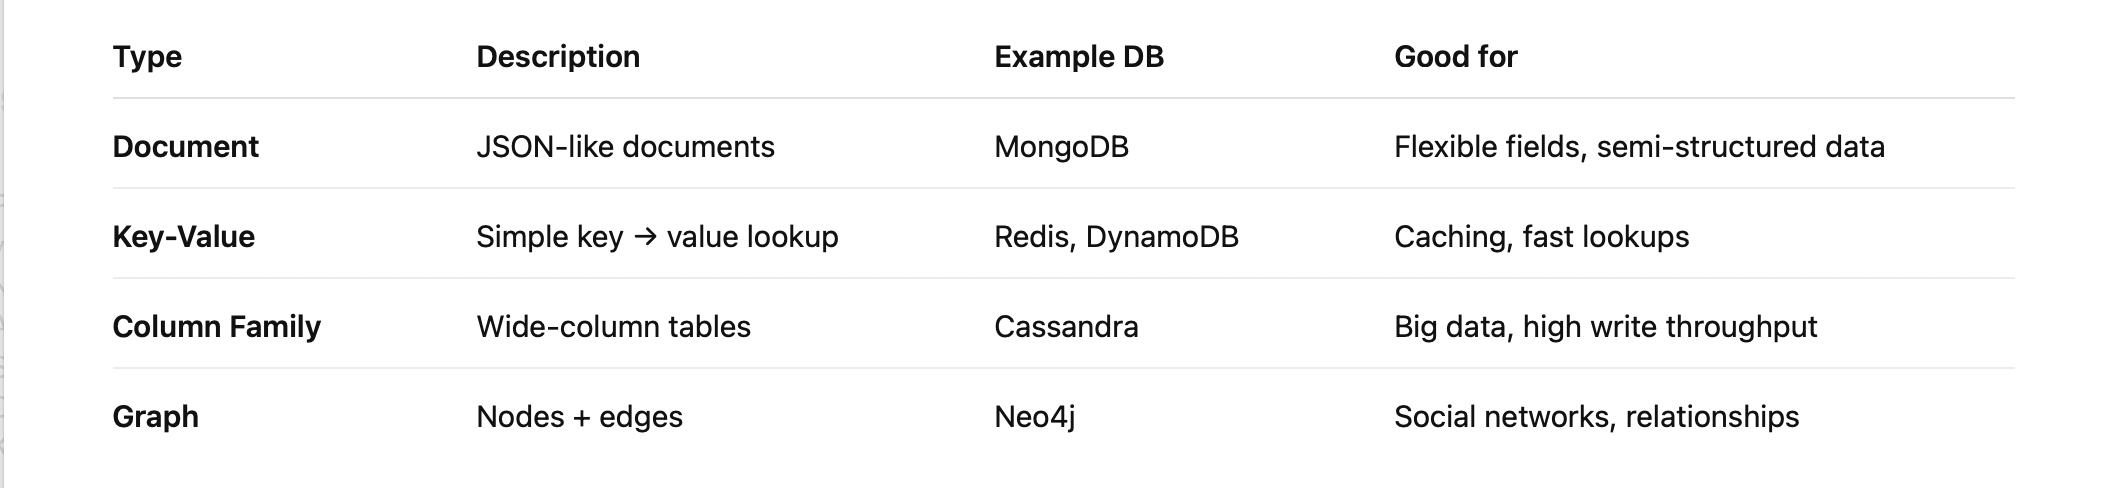


# ACID vs CAP theorem
## ACID (mostly SQL databases)
- Guarantees safe, stable transactions.
	- **A**tomicity: all or nothing, one of the writes in transaction fall, roll all back before the transaction
	- **C**onsistency: data always valid
	- **I**solation: transactions don’t affect each other
	- **D**urability: changes survive crashes

- Example: bank transfer must complete fully or not at all.
> frequently asked question in interviews, better to explain in yours own words

## CAP Theorem (**distributed systems** NoSQL)
- A distributed system can only guarantee 2 out of 3:
	- **C**onsistency: everyone sees the same data
	- **A**vailability: system always responds
	- **P**artition-tolerance: system works even if network splits

- Example:
	- **CP** (MongoDB in strong mode): consistent but maybe not always available
	- **AP** (Cassandra): always available, but might return slightly old data



# NoSQL
## Document databases (MongoDB)
MongoDB stores data as BSON documents (similar to JSON).  
Each document can have different fields, so flexible schema.
```json
{
  "name": "Yannis",
  "skills": ["Python", "SQL"],
  "age": 25
}
```
Good use cases:
	- User profiles
	- Product catalogs
	- Log/event data
	- Flexibly structured data
## Key-value stores (Redis)
Redis stores data as simple key → value pairs.
```text
user123 → {"name": "Chengyang", "score": 99}
session_token → "af3k9x92"
```
Good use cases:
	- Caching (fastest reads)
	- Session storage
	- Rate limiting
	- Message queues (using Redis streams)

## SQL vs NoSQL decision criteria

**Choose SQL when**:
	•	I need ACID transactions
	•	Data has a fixed schema
	•	I use complex JOINs
	•	Data consistency is important
Example: banking, inventory, ERP systems

**Choose NoSQL when:**
	•	Schema is flexible
	•	I need fast reads/writes at scale
	•	I store huge volumes of unstructured data
	•	I can tolerate eventual consistency
Example: IoT data, social media posts, logs
